In [1]:
from env import host, username, password
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from datetime import date
import nick_wrangle as get
import plotly.express as px

In [3]:
train, test = get.wrangle_superstore()
df = get.acquire_superstore_data()
df = get.prepare_superstore(df)

Using cached CSV
Using cached CSV
Using cached CSV
Using cached CSV


In [16]:
df.dtypes

product_id                     object
customer_id                    object
order_id                       object
ship_date              datetime64[ns]
ship_mode                      object
segment                        object
city                           object
state                          object
postal_code                   float64
sales                         float64
quantity                      float64
discount                      float64
profit                        float64
customer_name                  object
product_name                   object
category                       object
sub_category                   object
region_name                    object
days_bw_shipment      timedelta64[ns]
month                          object
year                            int64
profit_per_product            float64
sales_per_product             float64
brand                          object
dtype: object

In [ ]:
def set_brand():
    brands = df[['product_name']]

top_product_lines3 = top_product_lines[['product_name']]
# top_product_lines3.str.split(' ', expand=True)
df3 = pd.DataFrame(top_product_lines3.product_name.str.split(' ', expand=True))
# Deleted columns that don't capture brand name
df3 = df3.drop([1, 2, 3, 4, 5, 6, 7, 8, 9], axis=1)
df3 = df3.rename(columns={0: 'brand'})
#df3 = df3.brand.str[0:6]
top_brands = pd.concat([top_product_lines, df3], axis=1)

In [14]:
brands = df[['product_name']]
split = pd.DataFrame(brands.product_name.str.split(' ', expand=True))
split = split[[0]]
split = split.rename(columns={0: 'brand'})
split = pd.DataFrame(split.brand.str[0:6])
df = pd.concat([df, split], axis=1) 
df
#df = pd.concat([

#top_brands = pd.DataFrame(brandbase.brand.str[0:6])
#top_brands = pd.concat([brandbase, top_brands], axis=1)

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,brand
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-01-04 00:00:00,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928,Avery
2014-01-04 01:00:00,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912,SAFCO
2014-01-04 02:00:00,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770,GBC
2014-01-09 00:00:00,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672,Newell
2014-01-09 01:00:00,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400,Memore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 01:00:00,OFF-BI-10004632,EB-13975,CA-2017-115427,2018-01-03,Standard Class,Corporate,Fairfield,California,94533.0,20.720,...,Ibico Hi-Tech Manual Binding System,Office Supplies,Binders,West,4 days,December,2017,3.2375,10.360,Ibico
2017-12-30 02:00:00,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017,28.2555,104.650,Eureka
2017-12-30 03:00:00,FUR-BO-10003441,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,323.136,...,"Bush Westfield Collection Bookcases, Fully Assembled",Furniture,Bookcases,East,4 days,December,2017,3.0294,80.784,Bush


In [15]:
df.columns

Index(['product_id', 'customer_id', 'order_id', 'ship_date', 'ship_mode',
       'segment', 'city', 'state', 'postal_code', 'sales', 'quantity',
       'discount', 'profit', 'customer_name', 'product_name', 'category',
       'sub_category', 'region_name', 'days_bw_shipment', 'month', 'year',
       'profit_per_product', 'sales_per_product', 'brand'],
      dtype='object')

In [4]:
train.shape

(1238, 23)

In [5]:
test.shape

(496, 23)

In [6]:
train.index.is_unique
test.index.is_unique
# CLASS IS IN SESSION


True

In [9]:
# Let's see how each has changed over time 
office_supplies = train.loc[train['category'] == 'Office Supplies']
furniture = train.loc[train['category'] == 'Furniture']
technology = train.loc[train['category'] == 'Technology']

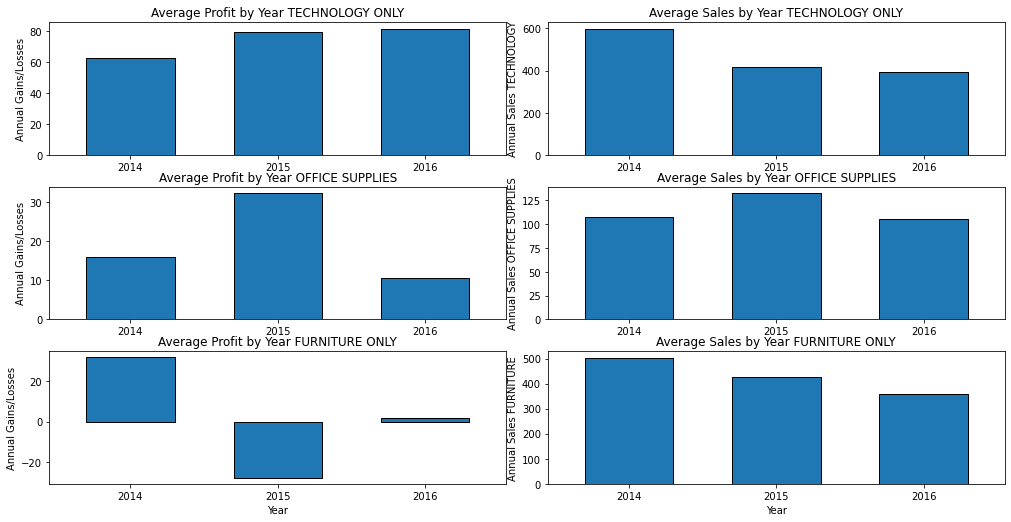

In [23]:
# Very consistent monthly profits for technology, in that we appear to never lose money. 
# Checking overall profit and sales in technology side by side
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 1)
y = technology.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 2)
y2 = technology.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Sales TECHNOLOGY')

# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 3)
y = office_supplies.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 4)
y2 = office_supplies.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Sales OFFICE SUPPLIES')

# Checking overall profit and sales in furniture side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 5)
y = furniture.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 6)
y2 = furniture.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')

plt.show()

In [5]:
def superstore_over_time(df):
    office_supplies = df.loc[df['category'] == 'Office Supplies']
    furniture = df.loc[df['category'] == 'Furniture']
    technology = df.loc[df['category'] == 'Technology']
    
    fig, axes = plt.subplots(nrows=3, ncols=2)
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    
    plt.rcParams["figure.figsize"] = (20,10)
    
    plt.subplot(3, 2, 1)
    y = technology.profit
    
    ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Gains/Losses')
    
    plt.subplot(3, 2, 2)
    y2 = technology.sales
    
    ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Sales TECHNOLOGY')
    
    # Checking profit and sales in office supplies side by side
    plt.rcParams["figure.figsize"] = (14,7)
    
    plt.subplot(3, 2, 3)
    y = office_supplies.profit
    
    ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Gains/Losses')
    
    plt.subplot(3, 2, 4)
    y2 = office_supplies.sales
    
    ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Sales OFFICE SUPPLIES')
    
    # Checking overall profit and sales in furniture side by side
    plt.rcParams["figure.figsize"] = (14,7)
    
    plt.subplot(3, 2, 5)
    y = furniture.profit
    
    ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains/Losses')
    
    plt.subplot(3, 2, 6)
    y2 = furniture.sales
    
    ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')
    
    plt.show()
    

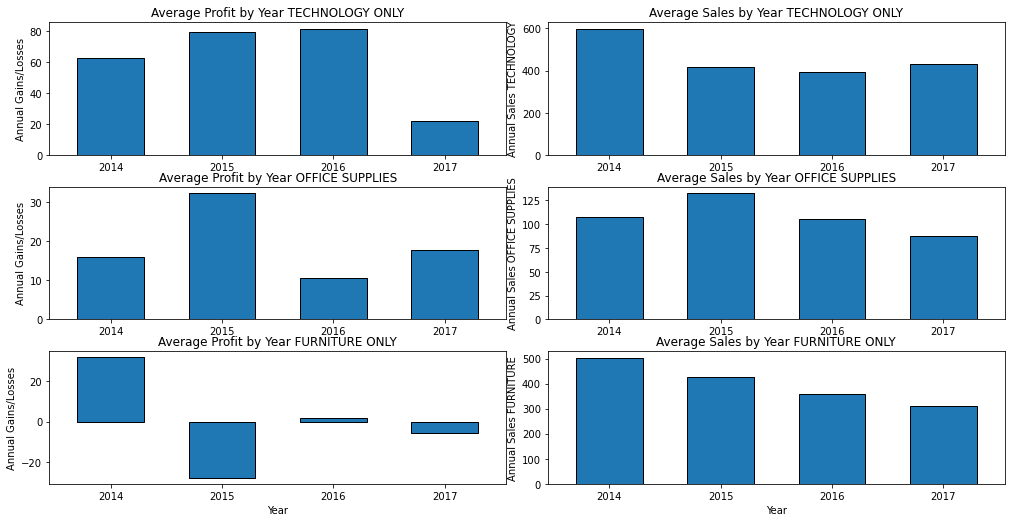

In [6]:
superstore_over_time(df)

In [ ]:
# Sorted profit_per_product in train in descending order
top_profit = train.sort_values(by='profit_per_product', ascending=False, na_position='last')
top_50_profitable_items = top_profit.head(50)
top_50_df = pd.DataFrame(top_50_profitable_items)
top_50_df

In [25]:
import mitosheet
mitosheet.sheet(top_50_df, analysis_to_replay="id-zkvqqtamuw")

MitoWidget(analysis_data_json='{"analysisName": "id-zkvqqtamuw", "analysisToReplay": null, "code": [], "stepSu…

In [15]:
# Sorted profit_per_product in train in ascending order
least_profit = train.sort_values(by='profit_per_product', ascending=True, na_position='last')
least_50_profitable_items = least_profit.head(50)
least_50_df = pd.DataFrame(least_50_profitable_items)
least_50_df

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-01-04 00:00:00,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928
2014-01-04 01:00:00,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912
2014-01-04 02:00:00,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770
2014-01-09 00:00:00,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672
2014-01-09 01:00:00,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400


In [10]:

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(office_supplies, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Office Supplies Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [11]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(technology, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Technology Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [12]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(furniture, x='sub_category', y='profit', color='region_name')
fig.update_layout(
    title='Profitability Among Furniture Products', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [13]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(office_supplies, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Office Supplies Products', 
    xaxis = dict(
        title='Product Type', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [14]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(technology, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Technology Products', 
    xaxis = dict(
        title='Product', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [15]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(furniture, x='sub_category', y='sales', color='region_name')
fig.update_layout(
    title='Sales Volume Among Furniture Products', 
    xaxis = dict(
        title='Products', 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Sum of Sales'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

In [ ]:
### Which products are most profitable?          
### Which products had outstanding sales volumes?          
### Does product type vary by customer/region?    

In [35]:
train2 = train.copy()
train2= train2.reset_index(drop=False)

In [37]:
train2
train2['fiscal_quarter'] = train2['order_date_anew'].dt.quarter

In [39]:
train2.set_index('order_date_anew')

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,fiscal_quarter
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-01-04 00:00:00,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928,1
2014-01-04 01:00:00,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912,1
2014-01-04 02:00:00,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770,1
2014-01-09 00:00:00,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672,1
2014-01-09 01:00:00,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24 01:00:00,OFF-ST-10003716,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,540.048,...,Tennsco Double-Tier Lockers,Office Supplies,Storage,South,4 days,December,2016,-15.7514,180.016,4
2016-12-24 02:00:00,TEC-AC-10004469,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,255.680,...,Microsoft Sculpt Comfort Mouse,Technology,Accessories,South,4 days,December,2016,9.5880,31.960,4
2016-12-26 00:00:00,OFF-PA-10003673,FP-14320,US-2016-153129,2016-12-30,Standard Class,Consumer,Seattle,Washington,98105.0,33.900,...,Strathmore Photo Mount Cards,Office Supplies,Paper,West,4 days,December,2016,3.1188,6.780,4


In [16]:
# Let's see how each has changed over time 
office_supplies_df = df.loc[df['category'] == 'Office Supplies']
furniture_df = df.loc[df['category'] == 'Furniture']
technology_df = df.loc[df['category'] == 'Technology']

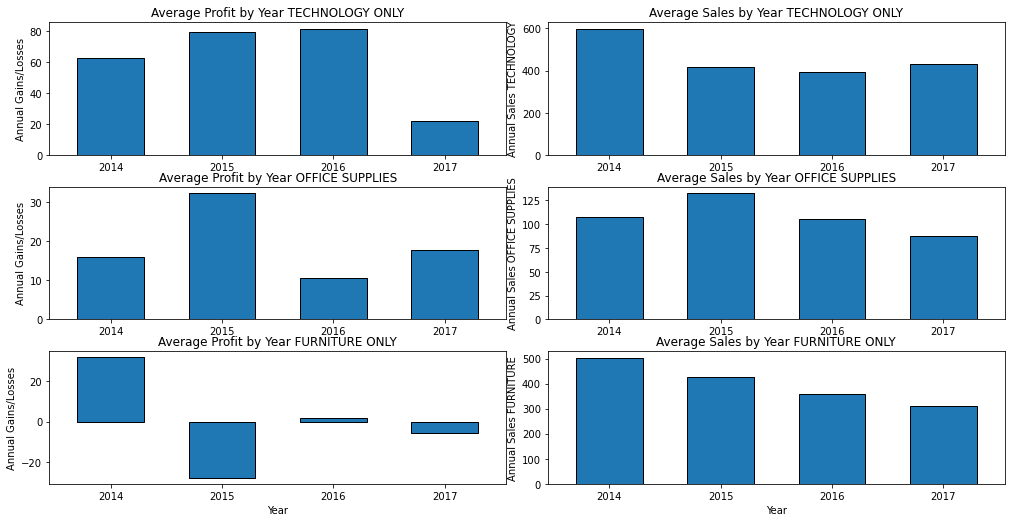

In [17]:
# Very consistent monthly profits for technology, in that we appear to never lose money. 
# Checking overall profit and sales in technology side by side
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 1)
y = technology_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 2)
y2 = technology_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='', ylabel='Annual Sales TECHNOLOGY')

# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 3)
y = office_supplies_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 4)
y2 = office_supplies_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='', ylabel='Annual Sales OFFICE SUPPLIES')

# Checking overall profit and sales in furniture side by side
plt.rcParams["figure.figsize"] = (14,7)

plt.subplot(3, 2, 5)
y = furniture_df.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains/Losses')

plt.subplot(3, 2, 6)
y2 = furniture_df.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.6, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')

plt.show()

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

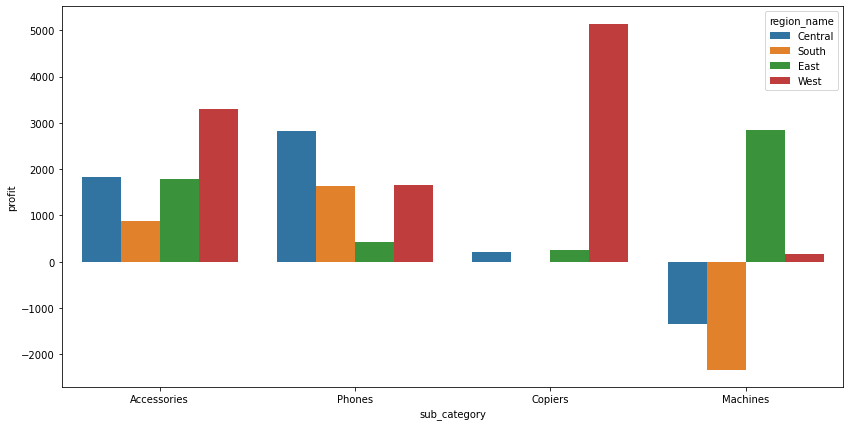

In [68]:
sns.barplot(data= technology_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum) 

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

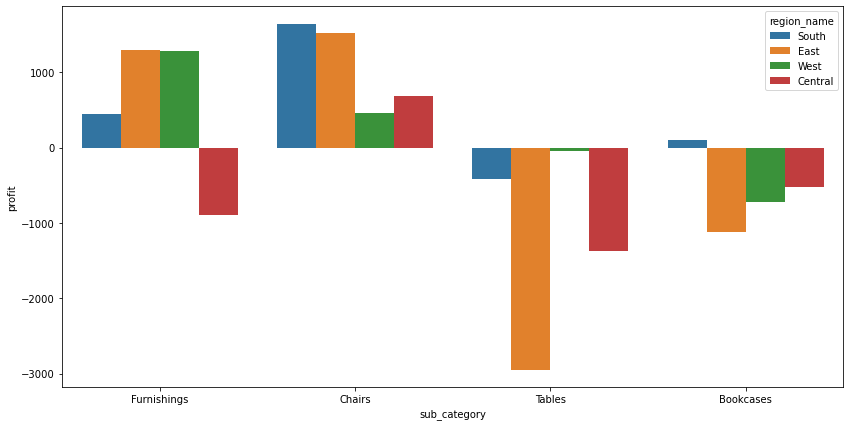

In [69]:
sns.barplot(data= furniture_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum) 

Text(0.5, 1.0, 'Furniture Products')

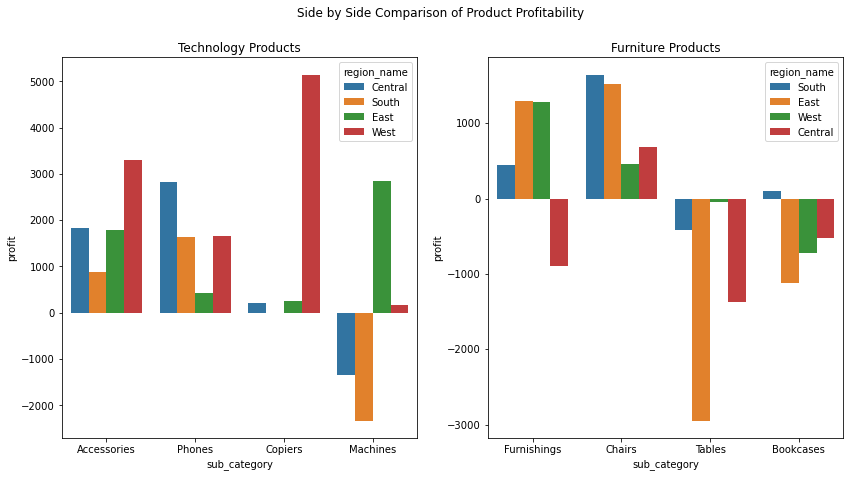

In [18]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Side by Side Comparison of Product Profitability')
sns.barplot(data= technology_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[0]).set_title('Technology Products')

sns.barplot(data= furniture_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[1]).set_title('Furniture Products')

In [19]:
def products_furn_and_tech(df):
    '''
    Takes in a df and creates subsets used to display the profit margins for 
    technology and furniture.
    '''
    furniture_df = df.loc[df['category'] == 'Furniture']
    technology_df = df.loc[df['category'] == 'Technology']
    
    fig, ax = plt.subplots(1,2)
    fig.suptitle('Side by Side Comparison of Product Profitability')
    sns.barplot(data= technology_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[0]).set_title('Technology Products')

    sns.barplot(data= furniture_df, x = 'sub_category', y= 'profit', hue = 'region_name', ci = None, estimator = np.sum, ax=ax[1]).set_title('Furniture Products')

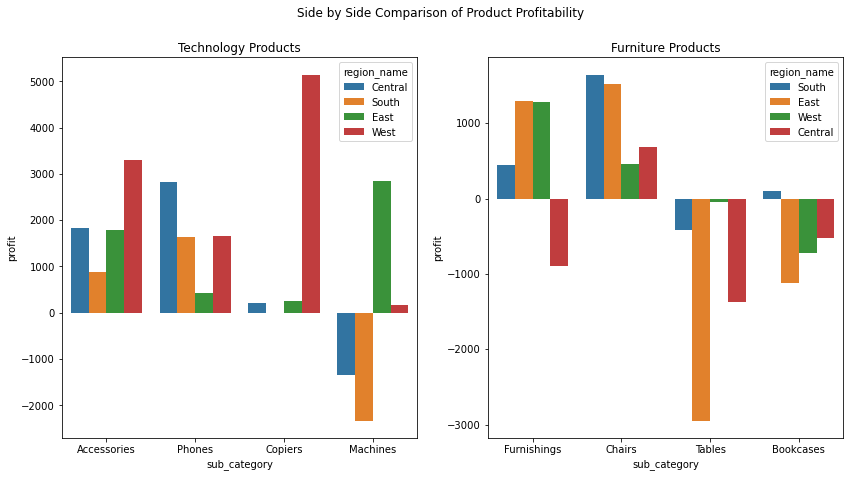

In [20]:
products_furn_and_tech(df)

In [ ]:
sns.barplot()

In [ ]:
df

In [80]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-xhuwkfmapq")

MitoWidget(analysis_data_json='{"analysisName": "id-xhuwkfmapq", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
#Accessories, Copiers, Machines, Phones  
technology_df = df.loc[df['category'] == 'Technology']

# subsetting by sub-category
accessories = technology_df.loc[technology_df['sub_category'] == 'Accessories']
copiers = technology_df.loc[technology_df['sub_category'] == 'Copiers']
machines = technology_df.loc[technology_df['sub_category'] == 'Machines']
phones = technology_df.loc[technology_df['sub_category'] == 'Phones']

# top 3 profitable products per category, per product
top3_accessories = accessories.sort_values(by='profit_per_product', ascending=False).head(3)
top3_copiers = copiers.sort_values(by='profit_per_product', ascending=False).head(3)
top3_machines = machines.sort_values(by='profit_per_product', ascending=False).head(3)
top3_phones = phones.sort_values(by='profit_per_product', ascending=False).head(3)

# data frame containing all 12 rows with top 3 products
top3_df = pd.concat([top3_accessories, top3_copiers], axis=0)
top3_df = pd.concat([top3_df, top3_machines], axis=0)
top3_df = pd.concat([top3_df, top3_phones], axis=0)

# the three least profitable products per category, per product
bottom3_accessories = accessories.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_copiers = copiers.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_machines = machines.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_phones = phones.sort_values(by='profit_per_product', ascending=True).head(3)

# data frame containing all 12 rows with bottom 3 products 
bottom3_df = pd.concat([bottom3_accessories, bottom3_copiers], axis=0)
bottom3_df = pd.concat([bottom3_df, bottom3_machines], axis=0)
bottom3_df = pd.concat([bottom3_df, bottom3_phones], axis=0)

# logitech is the only one that shares a spot with the topdawgs list, but lost $7. A small loss, worth keeping. 
# Each of the significant losses in technology is a consequence of a .4-.5 discount. 

In [21]:
def create_top_bottom_dfs(df): 
    ''' 
    Takes in superstore DataFrame and creates multiple subsets, sorted by profit-per-product
    in descendening order to show top products for each sub-categories, and ascending for the least
    profitable. Returns best and worst products dataframes.
    '''
    #Accessories, Copiers, Machines, Phones  
    technology_df = df.loc[df['category'] == 'Technology']
    
    # subsetting by sub-category
    accessories = technology_df.loc[technology_df['sub_category'] == 'Accessories']
    copiers = technology_df.loc[technology_df['sub_category'] == 'Copiers']
    machines = technology_df.loc[technology_df['sub_category'] == 'Machines']
    phones = technology_df.loc[technology_df['sub_category'] == 'Phones']
    
    # top 3 profitable products per category, per product
    top3_accessories = accessories.sort_values(by='profit_per_product', ascending=False).head(3)
    top3_copiers = copiers.sort_values(by='profit_per_product', ascending=False).head(3)
    top3_machines = machines.sort_values(by='profit_per_product', ascending=False).head(3)
    top3_phones = phones.sort_values(by='profit_per_product', ascending=False).head(3)
    
    # data frame containing all 12 rows with top 3 products
    top3_df = pd.concat([top3_accessories, top3_copiers], axis=0)
    top3_df = pd.concat([top3_df, top3_machines], axis=0)
    top3_df = pd.concat([top3_df, top3_phones], axis=0)
    
    # the three least profitable products per category, per product
    bottom3_accessories = accessories.sort_values(by='profit_per_product', ascending=True).head(3)
    bottom3_copiers = copiers.sort_values(by='profit_per_product', ascending=True).head(3)
    bottom3_machines = machines.sort_values(by='profit_per_product', ascending=True).head(3)
    bottom3_phones = phones.sort_values(by='profit_per_product', ascending=True).head(3)
    
    # data frame containing all 12 rows with bottom 3 products 
    bottom3_df = pd.concat([bottom3_accessories, bottom3_copiers], axis=0)
    bottom3_df = pd.concat([bottom3_df, bottom3_machines], axis=0)
    bottom3_df = pd.concat([bottom3_df, bottom3_phones], axis=0)
    
    return top3_df, bottom3_df

In [ ]:
top3_df

In [147]:
#top3_df
#bottom3_df
# logitech is the only one that shares a spot with the topdawgs list, but lost $7. A small loss, worth keeping. 
# Each of the significant losses in technology is a consequence of a .4-.5 discount. 

canon_df = technology_df.loc[technology_df['product_name'].str.startswith('Canon', na=False)]
ativa_df = technology_df.loc[technology_df['product_name'].str.startswith('Ativa', na=False)]
lexmark_df = technology_df.loc[technology_df['product_name'].str.startswith('Lexmark', na=False)]
logitech_df = technology_df.loc[technology_df['product_name'].str.startswith('Logitech', na=False)]
maxell_df = technology_df.loc[technology_df['product_name'].str.startswith('Maxell', na=False)]
plantronics_df = technology_df.loc[technology_df['product_name'].str.startswith('Plantronics', na=False)]
polycom_df = technology_df.loc[technology_df['product_name'].str.startswith('Polycom', na=False)]
konftel_df = technology_df.loc[technology_df['product_name'].str.startswith('Konftel', na=False)]
mitel_df = technology_df.loc[technology_df['product_name'].str.startswith('Mitel', na=False)]

top_product_lines = pd.concat([canon_df, ativa_df], axis=0)
top_product_lines = pd.concat([top_product_lines, lexmark_df], axis=0)
top_product_lines = pd.concat([top_product_lines, logitech_df], axis=0)
top_product_lines = pd.concat([top_product_lines, maxell_df], axis=0)
top_product_lines = pd.concat([top_product_lines, plantronics_df], axis=0)
top_product_lines = pd.concat([top_product_lines, polycom_df], axis=0)
top_product_lines = pd.concat([top_product_lines, konftel_df], axis=0)
top_product_lines = pd.concat([top_product_lines, mitel_df], axis=0)

In [22]:
def top_product_lines(df):
    
    #Accessories, Copiers, Machines, Phones  
    technology_df = df.loc[df['category'] == 'Technology']
    
    canon_df = technology_df.loc[technology_df['product_name'].str.startswith('Canon', na=False)]
    ativa_df = technology_df.loc[technology_df['product_name'].str.startswith('Ativa', na=False)]
    lexmark_df = technology_df.loc[technology_df['product_name'].str.startswith('Lexmark', na=False)]
    logitech_df = technology_df.loc[technology_df['product_name'].str.startswith('Logitech', na=False)]
    maxell_df = technology_df.loc[technology_df['product_name'].str.startswith('Maxell', na=False)]
    plantronics_df = technology_df.loc[technology_df['product_name'].str.startswith('Plantronics', na=False)]
    polycom_df = technology_df.loc[technology_df['product_name'].str.startswith('Polycom', na=False)]
    konftel_df = technology_df.loc[technology_df['product_name'].str.startswith('Konftel', na=False)]
    mitel_df = technology_df.loc[technology_df['product_name'].str.startswith('Mitel', na=False)]
    
    top_product_lines = pd.concat([canon_df, ativa_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, lexmark_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, logitech_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, maxell_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, plantronics_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, polycom_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, konftel_df], axis=0)
    top_product_lines = pd.concat([top_product_lines, mitel_df], axis=0)
    
    return top_product_lines

In [23]:
top_product_lines = top_product_lines(df)

In [24]:
top_product_lines

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-07-06 00:00:00,TEC-CO-10001046,EP-13915,CA-2014-134278,2014-07-08,First Class,Consumer,New York City,New York,10011.0,559.992,...,Emily Phan,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,July,2014,174.9975,559.992
2014-09-21 01:00:00,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,Washington,98198.0,1799.970,...,Jack Garza,Canon PC1080F Personal Copier,Technology,Copiers,West,2 days,September,2014,233.9961,599.990
2014-11-04 01:00:00,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,New York,10024.0,3991.980,...,Nathan Mautz,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,Machines,East,5 days,November,2014,997.9950,1995.990
2015-03-19 02:00:00,TEC-CO-10001766,FH-14365,CA-2015-111829,2015-03-20,First Class,Corporate,Seattle,Washington,98115.0,3149.930,...,Fred Hopkins,Canon PC940 Copier,Technology,Copiers,West,1 days,March,2015,211.4953,449.990
2016-05-30 06:00:00,TEC-CO-10001046,BG-11695,CA-2016-153682,2016-06-01,First Class,Corporate,Cincinnati,Ohio,45231.0,839.988,...,Brooke Gillingham,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,May,2016,34.9995,419.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-09 06:00:00,TEC-PH-10002033,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,911.424,...,Brosina Hoffman,Konftel 250 Conference phone - Charcoal black,Technology,Phones,West,5 days,June,2014,17.0892,227.856
2014-06-21 01:00:00,TEC-PH-10002033,NP-18325,US-2014-117135,2014-06-23,Second Class,Consumer,Waynesboro,Virginia,22980.0,284.820,...,Naresj Patel,Konftel 250 Conference phone - Charcoal black,Technology,Phones,South,2 days,June,2014,74.0532,284.820
2014-06-09 02:00:00,TEC-PH-10002275,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,907.152,...,Brosina Hoffman,Mitel 5320 IP Phone VoIP phone,Technology,Phones,West,5 days,June,2014,15.1192,151.192


In [172]:
canon_df.profit_per_product.mean()


277.69692857142854

In [174]:
top_product_lines.columns

Index(['product_id', 'customer_id', 'order_id', 'ship_date', 'ship_mode',
       'segment', 'city', 'state', 'postal_code', 'sales', 'quantity',
       'discount', 'profit', 'customer_name', 'product_name', 'category',
       'sub_category', 'region_name', 'days_bw_shipment', 'month', 'year',
       'profit_per_product', 'sales_per_product', 'brand'],
      dtype='object')

In [35]:
top_product_lines3 = top_product_lines[['product_name']]
# top_product_lines3.str.split(' ', expand=True)
df2 = pd.DataFrame(top_product_lines3.product_name.str.split(' ', expand=True))
# Deleted columns that don't capture brand name
df2 = df2.drop([1, 2, 3, 4, 5, 6, 7, 8, 9], axis=1)




#df2.drop([1], axis=1, inplace=True)
## Deleted column 2 from df2
#df2.drop([2], axis=1, inplace=True)
## Deleted column 3 from df2
#df2.drop([3], axis=1, inplace=True)
## Deleted column 4 from df2
#df2.drop([4], axis=1, inplace=True)
## Deleted column 5 from df2
#df2.drop([5], axis=1, inplace=True)
## Deleted column 6 from df2
#df2.drop([6], axis=1, inplace=True)
## Deleted column 7 from df2
#df2.drop([7], axis=1, inplace=True)
## Deleted column 8 from df2
#df2.drop([8], axis=1, inplace=True)
## Deleted column 9 from df2
#df2.drop([9], axis=1, inplace=True)
#brandbase = pd.concat([top_product_lines, df2], axis=1)
#brandbase



,0
order_date_anew,
2014-07-06 00:00:00,Canon
2014-09-21 01:00:00,Canon
2014-11-04 01:00:00,Canon
2015-03-19 02:00:00,Canon
2016-05-30 06:00:00,Canon
...,...
2014-06-09 06:00:00,Konftel
2014-06-21 01:00:00,Konftel
2014-06-09 02:00:00,Mitel


In [151]:
brandbase = brandbase.rename(columns={0: 'brand'})
#brandwaste = brandbase.copy()
#pd.DataFrame(brandwaste.product_name.str.split(' ', expand=True))

In [52]:
life = pd.DataFrame(brandbase.brand.str[0:6])
life
top_product_lines = pd.concat([top_product_lines, life], axis=1)
# remove outlier quantities 
#top_product_lines2 = top_product_lines[~top_product_lines['quantity'].isin([13, 12, 11])]

In [53]:
df2 = pd.concat([df, life], axis=1)

In [118]:
def top_brands_df(top_product_lines):
    '''
    Using the previous top_product_lines UDF, feed this function that output
    and you'll be returned the full dataframe where the top technology brands are 
    explicitly named.
    '''
    top_product_lines3 = top_product_lines[['product_name']]
    # top_product_lines3.str.split(' ', expand=True)
    df3 = pd.DataFrame(top_product_lines3.product_name.str.split(' ', expand=True))
    # Deleted columns that don't capture brand name
    df3 = df3.drop([1, 2, 3, 4, 5, 6, 7, 8, 9], axis=1)
    df3 = df3.rename(columns={0: 'brand'})
    #df3 = df3.brand.str[0:6]
    top_brands = pd.concat([top_product_lines, df3], axis=1)
    #top_brands = brandbase.rename(columns={0: 'brand'})
    #top_brands = pd.DataFrame(brandbase.brand.str[0:6])
    #top_brands = pd.concat([brandbase, top_brands], axis=1)
    return top_brands
    

In [119]:
top_brands2 = top_brands_df(top_product_lines)

In [120]:
top_brands2.head(20)

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,brand,brand
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-07-06 00:00:00,TEC-CO-10001046,EP-13915,CA-2014-134278,2014-07-08,First Class,Consumer,New York City,New York,10011.0,559.992,...,Technology,Copiers,East,2 days,July,2014,174.9975,559.992,Canon,Canon
2014-09-21 01:00:00,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,Washington,98198.0,1799.970,...,Technology,Copiers,West,2 days,September,2014,233.9961,599.990,Canon,Canon
2014-11-04 01:00:00,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,New York,10024.0,3991.980,...,Technology,Machines,East,5 days,November,2014,997.9950,1995.990,Canon,Canon
2015-03-19 02:00:00,TEC-CO-10001766,FH-14365,CA-2015-111829,2015-03-20,First Class,Corporate,Seattle,Washington,98115.0,3149.930,...,Technology,Copiers,West,1 days,March,2015,211.4953,449.990,Canon,Canon
2016-05-30 06:00:00,TEC-CO-10001046,BG-11695,CA-2016-153682,2016-06-01,First Class,Corporate,Cincinnati,Ohio,45231.0,839.988,...,Technology,Copiers,East,2 days,May,2016,34.9995,419.994,Canon,Canon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-22 01:00:00,TEC-AC-10002567,EM-14065,CA-2014-127691,2014-07-27,Standard Class,Consumer,New York City,New York,10024.0,159.980,...,Technology,Accessories,East,5 days,July,2014,28.7964,79.990,Logite,Logitech
2014-09-08 02:00:00,TEC-AC-10001383,GZ-14470,CA-2014-132500,2014-09-12,Standard Class,Consumer,San Francisco,California,94110.0,49.980,...,Technology,Accessories,West,4 days,September,2014,4.2483,24.990,Logite,Logitech
2014-12-02 00:00:00,TEC-AC-10003628,DP-13165,CA-2014-112158,2014-12-04,First Class,Consumer,New York City,New York,10035.0,119.960,...,Technology,Accessories,East,2 days,December,2014,13.1956,29.990,Logite,Logitech


In [121]:
top_product_lines

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,brand
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-07-06 00:00:00,TEC-CO-10001046,EP-13915,CA-2014-134278,2014-07-08,First Class,Consumer,New York City,New York,10011.0,559.992,...,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,July,2014,174.9975,559.992,Canon
2014-09-21 01:00:00,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,Washington,98198.0,1799.970,...,Canon PC1080F Personal Copier,Technology,Copiers,West,2 days,September,2014,233.9961,599.990,Canon
2014-11-04 01:00:00,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,New York,10024.0,3991.980,...,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,Machines,East,5 days,November,2014,997.9950,1995.990,Canon
2015-03-19 02:00:00,TEC-CO-10001766,FH-14365,CA-2015-111829,2015-03-20,First Class,Corporate,Seattle,Washington,98115.0,3149.930,...,Canon PC940 Copier,Technology,Copiers,West,1 days,March,2015,211.4953,449.990,Canon
2016-05-30 06:00:00,TEC-CO-10001046,BG-11695,CA-2016-153682,2016-06-01,First Class,Corporate,Cincinnati,Ohio,45231.0,839.988,...,Canon Imageclass D680 Copier / Fax,Technology,Copiers,East,2 days,May,2016,34.9995,419.994,Canon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-09 06:00:00,TEC-PH-10002033,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,911.424,...,Konftel 250 Conference phone - Charcoal black,Technology,Phones,West,5 days,June,2014,17.0892,227.856,Konfte
2014-06-21 01:00:00,TEC-PH-10002033,NP-18325,US-2014-117135,2014-06-23,Second Class,Consumer,Waynesboro,Virginia,22980.0,284.820,...,Konftel 250 Conference phone - Charcoal black,Technology,Phones,South,2 days,June,2014,74.0532,284.820,Konfte
2014-06-09 02:00:00,TEC-PH-10002275,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,907.152,...,Mitel 5320 IP Phone VoIP phone,Technology,Phones,West,5 days,June,2014,15.1192,151.192,Mitel


<AxesSubplot:xlabel='brand'>

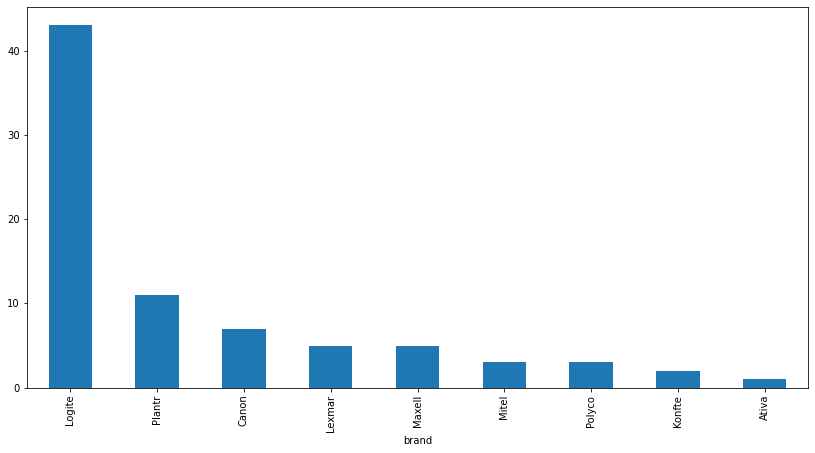

In [61]:
top_brands.groupby('brand').size().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='brand'>

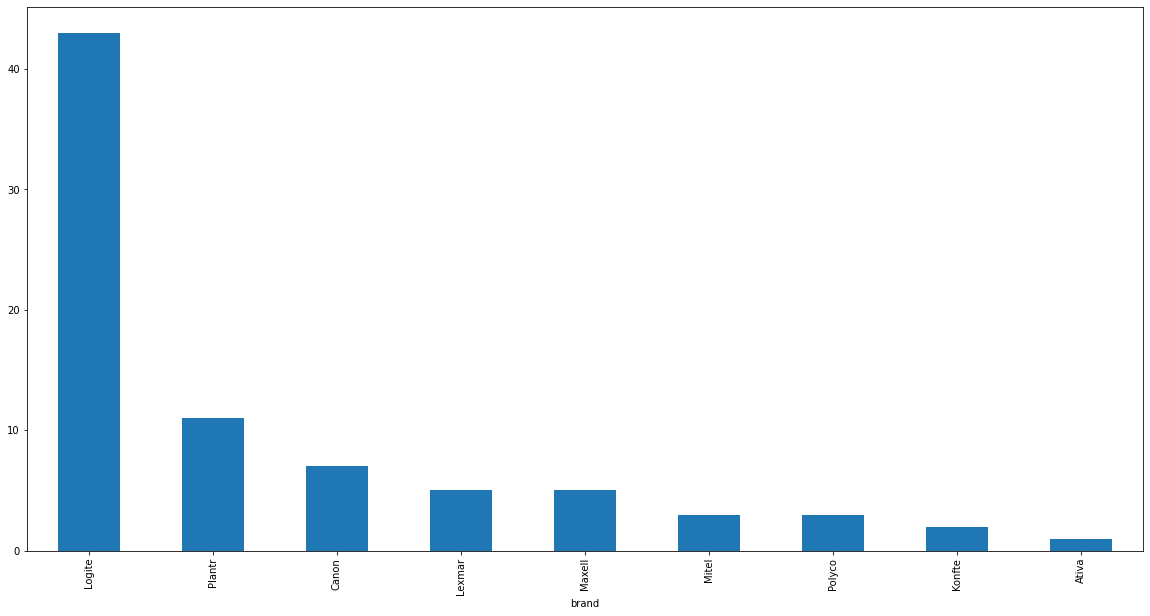

In [190]:
df2.groupby('brand').size().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='brand'>

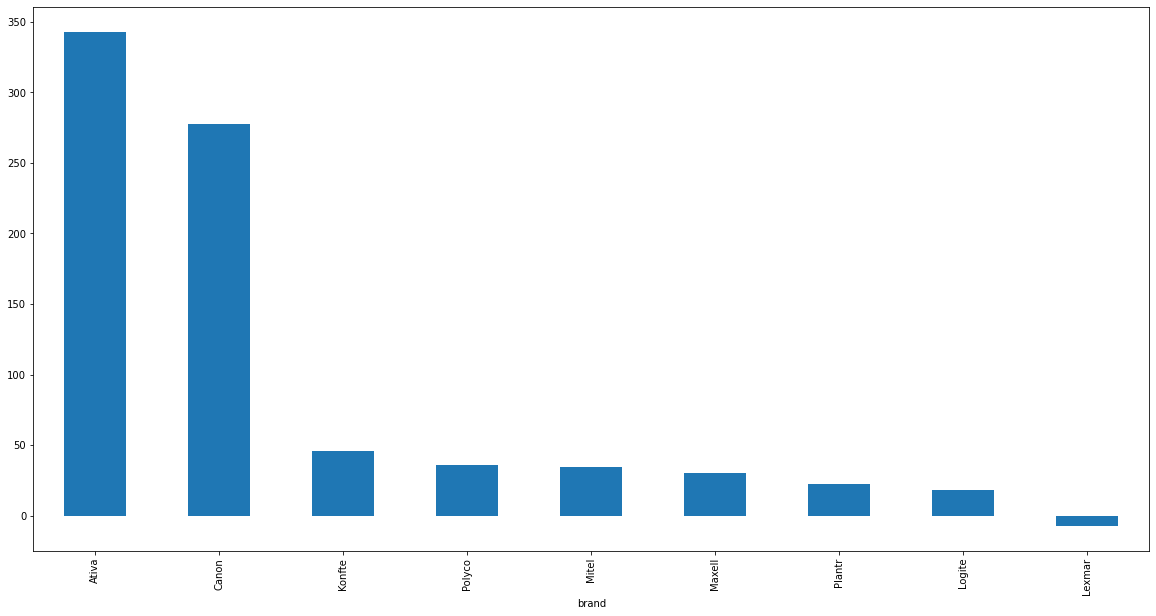

In [191]:
df2.groupby('brand').profit_per_product.mean().sort_values(ascending=False).plot.bar()

In [197]:
top_product_lines.product_name.value_counts()

Logitech P710e Mobile Speakerphone                                                     6
Logitech G19 Programmable Gaming Keyboard                                              4
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                              3
Plantronics Cordless Phone Headset with In-line Volume - M214C                         3
Plantronics S12 Corded Telephone Headset System                                        3
Lexmark MX611dhe Monochrome Laser Printer                                              3
Canon Imageclass D680 Copier / Fax                                                     2
Logitech G13 Programmable Gameboard with LCD Display                                   2
Logitech G700s Rechargeable Gaming Mouse                                               2
Logitech B530 USB Headset - headset - Full size, Binaural                              2
Logitech LS21 Speaker System - PC Multimedia - 2.1-CH - Wired                          2
Logitech Illuminated 

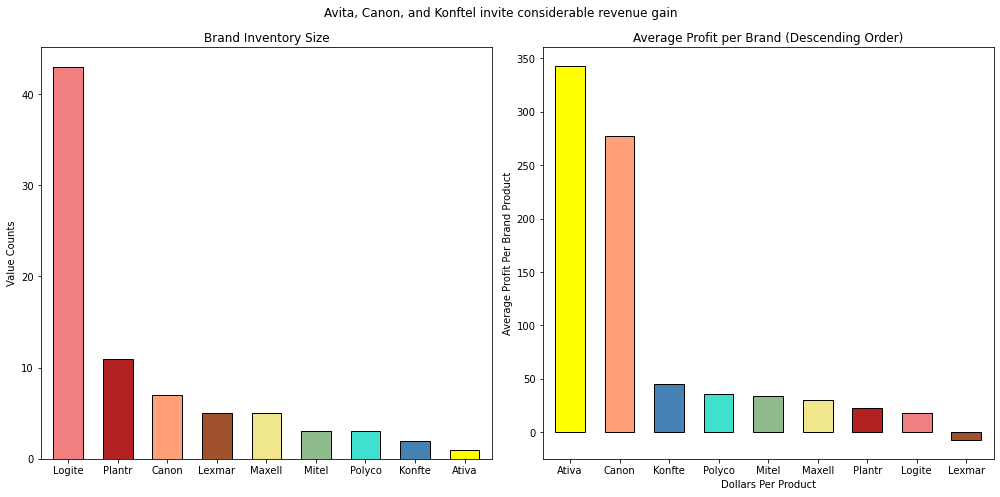

In [204]:
plt.rcParams["figure.figsize"] = (14,7)
fig, axes = plt.subplots(nrows=1, ncols=2)


plt.subplot(1,2,1)
ax = df2.groupby('brand').size().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'lightsalmon', 'sienna', 'khaki', 'darkseagreen', 'turquoise', 'steelblue', 'yellow'])
plt.xticks(rotation=0)
ax.set(title='Brand Inventory Size', xlabel='', ylabel='Value Counts')

plt.subplot(1,2,2)
ax = df2.groupby('brand').profit_per_product.mean().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['yellow', 'lightsalmon', 'steelblue', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna'])
plt.xticks(rotation=0)
ax.set(title='Average Profit per Brand (Descending Order)', xlabel='Dollars Per Product', ylabel='Average Profit Per Brand Product')

fig.suptitle('Avita, Canon, and Konftel invite considerable revenue gain')

fig.tight_layout()

In [117]:
top_brands

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product,brand,brand
order_date_anew,,,,,,,,,,,,,,,,,,,,,
2014-07-06 00:00:00,TEC-CO-10001046,EP-13915,CA-2014-134278,2014-07-08,First Class,Consumer,New York City,New York,10011.0,559.992,...,Technology,Copiers,East,2 days,July,2014,174.9975,559.992,Canon,Canon
2014-09-21 01:00:00,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,Washington,98198.0,1799.970,...,Technology,Copiers,West,2 days,September,2014,233.9961,599.990,Canon,Canon
2014-11-04 01:00:00,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,New York,10024.0,3991.980,...,Technology,Machines,East,5 days,November,2014,997.9950,1995.990,Canon,Canon
2015-03-19 02:00:00,TEC-CO-10001766,FH-14365,CA-2015-111829,2015-03-20,First Class,Corporate,Seattle,Washington,98115.0,3149.930,...,Technology,Copiers,West,1 days,March,2015,211.4953,449.990,Canon,Canon
2016-05-30 06:00:00,TEC-CO-10001046,BG-11695,CA-2016-153682,2016-06-01,First Class,Corporate,Cincinnati,Ohio,45231.0,839.988,...,Technology,Copiers,East,2 days,May,2016,34.9995,419.994,Canon,Canon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-09 06:00:00,TEC-PH-10002033,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,911.424,...,Technology,Phones,West,5 days,June,2014,17.0892,227.856,Konfte,Konftel
2014-06-21 01:00:00,TEC-PH-10002033,NP-18325,US-2014-117135,2014-06-23,Second Class,Consumer,Waynesboro,Virginia,22980.0,284.820,...,Technology,Phones,South,2 days,June,2014,74.0532,284.820,Konfte,Konftel
2014-06-09 02:00:00,TEC-PH-10002275,BH-11710,CA-2014-115812,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032.0,907.152,...,Technology,Phones,West,5 days,June,2014,15.1192,151.192,Mitel,Mitel


In [122]:
def show_top_brands(top_product_lines):
    '''
    Takes in the previously established brand-based DataFrame and returns
    two histogram plots via a groupby brand method. The first plot lists
    the product inventory collectively, and the second shows the profitabilty
    for each brand in descending order.
    '''
    
    plt.rcParams["figure.figsize"] = (14,7)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    
    plt.subplot(1,2,1)
    ax = top_product_lines.groupby('brand').size().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'lightsalmon', 'sienna', 'khaki', 'darkseagreen', 'turquoise', 'steelblue', 'yellow'])
    plt.xticks(rotation=0)
    ax.set(title='Brand Inventory Size', xlabel='', ylabel='Value Counts')
    
    plt.subplot(1,2,2)
    ax = top_product_lines.groupby('brand').profit_per_product.mean().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['yellow', 'lightsalmon', 'steelblue', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna'])
    plt.xticks(rotation=0)
    ax.set(title='Average Profit per Brand (Descending Order)', xlabel='Dollars Per Product', ylabel='Average Profit Per Brand Product')
    
    fig.suptitle('Avita, Canon, and Konftel invite considerable revenue gain')
    
    fig.tight_layout()

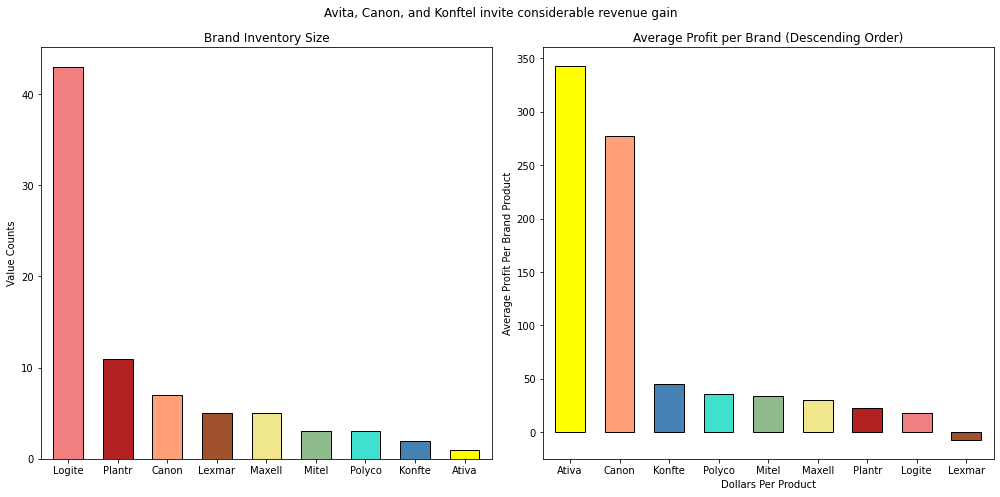

In [123]:
show_top_brands(top_product_lines)

ValueError: Grouper for 'brand' not 1-dimensional

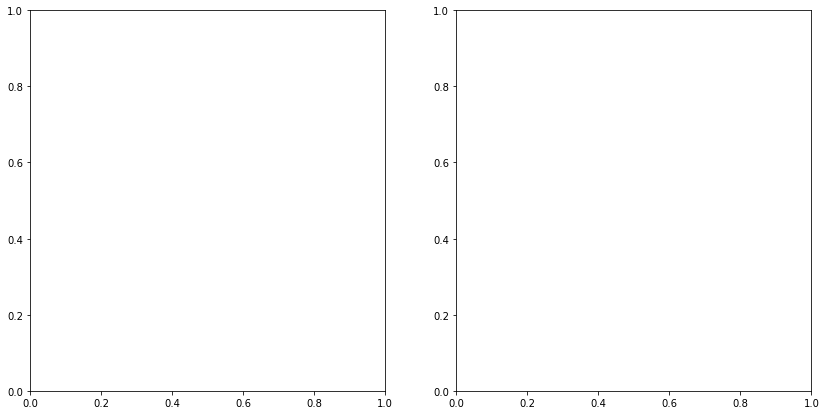

In [76]:
show_top_brands(top_brands)

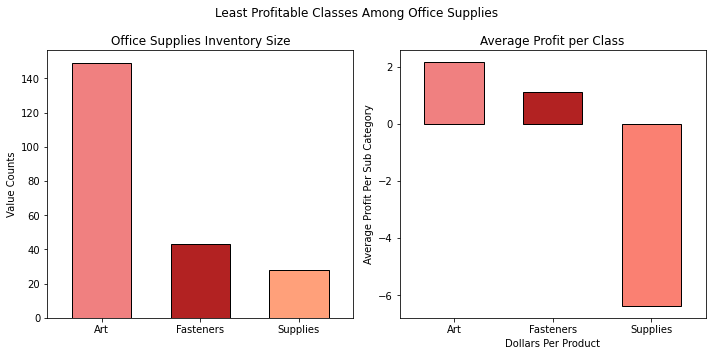

In [223]:
plt.rcParams["figure.figsize"] = (10,5)
fig, axes = plt.subplots(nrows=1, ncols=2)


plt.subplot(1,2,1)
ax = office_things.groupby('sub_category').size().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'lightsalmon', 'sienna', 'khaki', 'darkseagreen', 'turquoise', 'steelblue', 'yellow'])
plt.xticks(rotation=0)
ax.set(title='Office Supplies Inventory Size', xlabel='', ylabel='Value Counts')

plt.subplot(1,2,2)
ax = office_things.groupby('sub_category').profit_per_product.mean().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'salmon', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna'])
plt.xticks(rotation=0)
ax.set(title='Average Profit per Class', xlabel='Dollars Per Product', ylabel='Average Profit Per Sub Category')

fig.suptitle('Least Profitable Classes Among Office Supplies')

fig.tight_layout()

In [131]:
def show_office_inventory_bad_cats(df):
    '''
    Display the worst sub-categories for our office supplies business model. 
    Also includes the grouby function used to look at the sub-categories profit per product
    within the entire office supplies supply
    '''  
    office_supplies = df.loc[df['category'] == 'Office Supplies']
    noffice = office_supplies.loc[office_supplies['sub_category'] == 'Supplies']
    soffice = office_supplies.loc[office_supplies['sub_category'] == 'Art']
    bloffice = office_supplies.loc[office_supplies['sub_category'] == 'Fasteners']
    
    print(f"{office_supplies.groupby('sub_category').profit_per_product.mean().sort_values(ascending=False)}")
    
    office_things = pd.concat([noffice, soffice], axis=0)
    office_things = pd.concat([office_things, bloffice], axis=0)
    office_things
    
    plt.rcParams["figure.figsize"] = (10,5)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    
    plt.subplot(1,2,1)
    ax = office_things.groupby('sub_category').size().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'lightsalmon', 'sienna', 'khaki', 'darkseagreen', 'turquoise', 'steelblue', 'yellow'])
    plt.xticks(rotation=0)
    ax.set(title='Office Supplies Inventory Size', xlabel='', ylabel='Value Counts')
    
    plt.subplot(1,2,2)
    ax = office_things.groupby('sub_category').profit_per_product.mean().sort_values(ascending=False).plot.bar(width=.6, ec='black', color=['lightcoral', 'firebrick', 'salmon', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna'])
    plt.xticks(rotation=0)
    ax.set(title='Average Profit per Class', xlabel='Dollars Per Product', ylabel='Average Profit Per Sub Category')
    
    fig.suptitle('Least Profitable Classes Among Office Supplies')
    
    fig.tight_layout()

sub_category
Appliances    8.576228
Envelopes     8.453231
Paper         6.648605
Storage       5.900126
Labels        5.374437
Binders       3.352888
Art           2.146061
Fasteners     1.121651
Supplies     -6.367511
Name: profit_per_product, dtype: float64


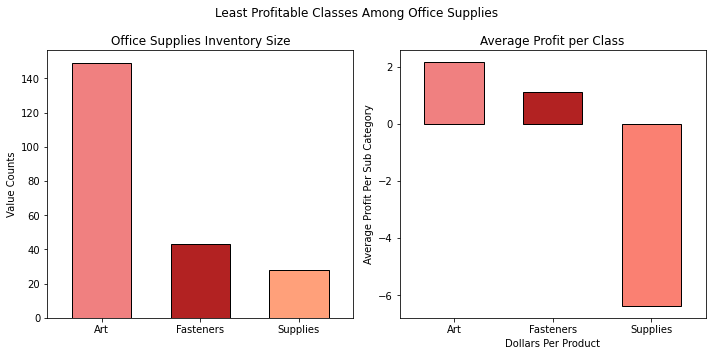

In [130]:
show_office_inventory_bad_cats(df)

In [209]:
office_supplies.groupby('sub_category').profit_per_product.mean().sort_values(ascending=False)

sub_category
Appliances    8.576228
Envelopes     8.453231
Paper         6.648605
Storage       5.900126
Labels        5.374437
Binders       3.352888
Art           2.146061
Fasteners     1.121651
Supplies     -6.367511
Name: profit_per_product, dtype: float64

In [231]:
ativa = df2.loc[df2['brand'] == 'Ativa']
canon = df2.loc[df2['brand'] == 'Canon']
konfte = df2.loc[df2['brand'] == 'Konfte']
logite = df2.loc[df2['brand'] == 'Logite']

three_brands = pd.concat([ativa, canon], axis=0)
three_brands2 = pd.concat([three_brands, konfte], axis=0)

Text(0.5, 1.0, 'Technology Products')

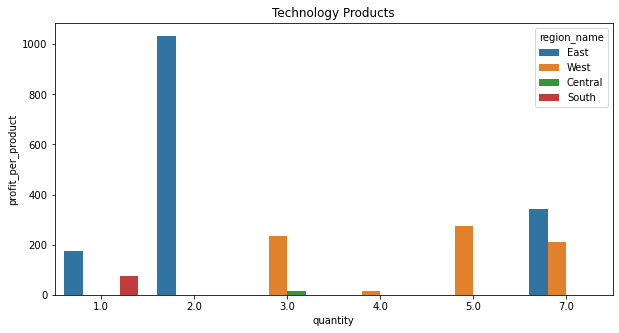

In [232]:

sns.barplot(data= three_brands2, x = 'quantity', y= 'profit_per_product', hue = 'region_name', ci = None, estimator = np.sum).set_title('Technology Products')

In [ ]:
office_supplies = df.loc[df['category'] == 'Office Supplies']
noffice = office_supplies.loc[office_supplies['sub_category'] == 'Supplies']
soffice = office_supplies.loc[office_supplies['sub_category'] == 'Art']
bloffice = office_supplies.loc[office_supplies['sub_category'] == 'Fasteners']

In [ ]:
color=['yellow', 'lightsalmon', 'steelblue', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna']
'yellow', 'lightsalmon', 'steelblue', 'turquoise', 'darkseagreen', 'khaki', 'firebrick', 'lightcoral', 'sienna'

In [ ]:
top_product_lines

In [156]:
top_product_lines.brand.value_counts()

Logite    43
Plantr    11
Canon      7
Lexmar     5
Maxell     5
Polyco     3
Mitel      3
Konfte     2
Ativa      1
Name: brand, dtype: int64

In [154]:
import mitosheet
mitosheet.sheet(top_product_lines, analysis_to_replay="id-bffoudlwsc")

MitoWidget(analysis_data_json='{"analysisName": "id-bffoudlwsc", "analysisToReplay": null, "code": [], "stepSu…

<AxesSubplot:xlabel='quantity', ylabel='profit_per_product'>

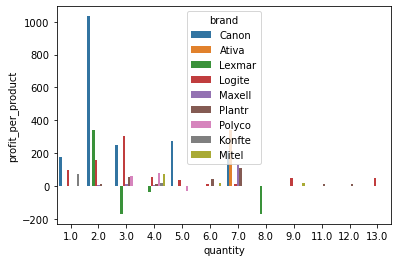

In [157]:
sns.barplot(data= top_product_lines, x = 'quantity', y= 'profit_per_product', hue = 'brand', ci = None, estimator = np.sum) 

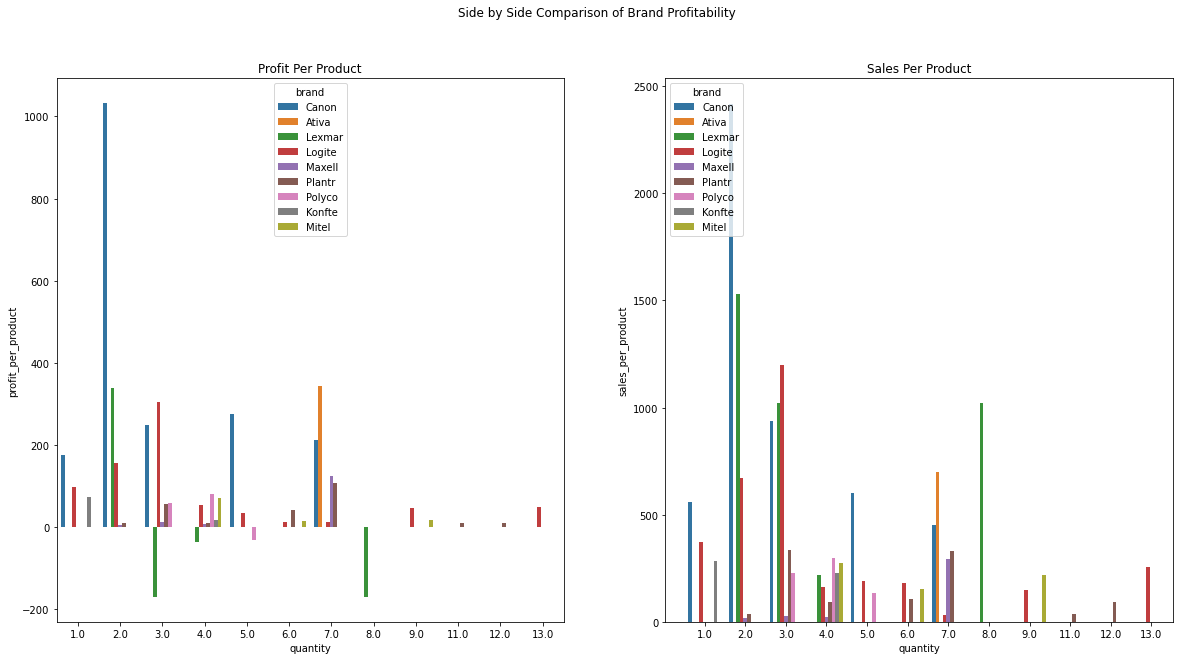

In [161]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1,2)
fig.suptitle('Side by Side Comparison of Brand Profitability')
sns.barplot(data= top_product_lines, x = 'quantity', y= 'profit_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[0]).set_title('Profit Per Product')

sns.barplot(data= top_product_lines, x = 'quantity', y= 'sales_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[1]).set_title('Sales Per Product')

plt.autoscale()

Text(0.5, 1.0, 'Profit Per Product')

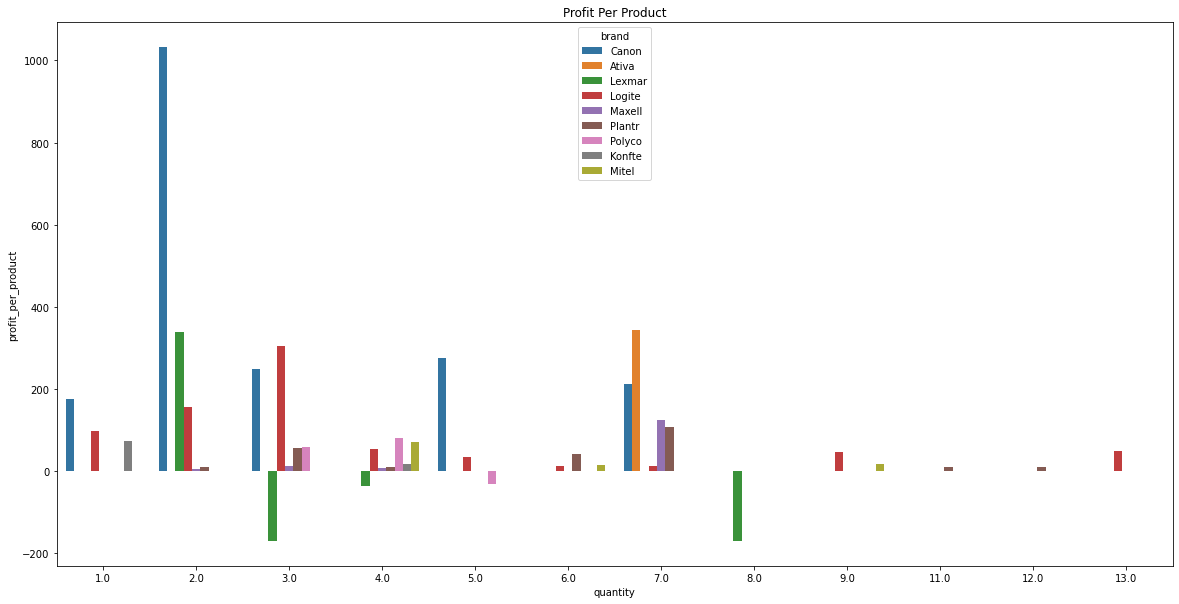

In [163]:
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot(data= top_product_lines, x = 'quantity', y= 'profit_per_product', hue = 'brand', ci = None, estimator = np.sum).set_title('Profit Per Product')

Text(0.5, 1.0, 'Sales Per Product')

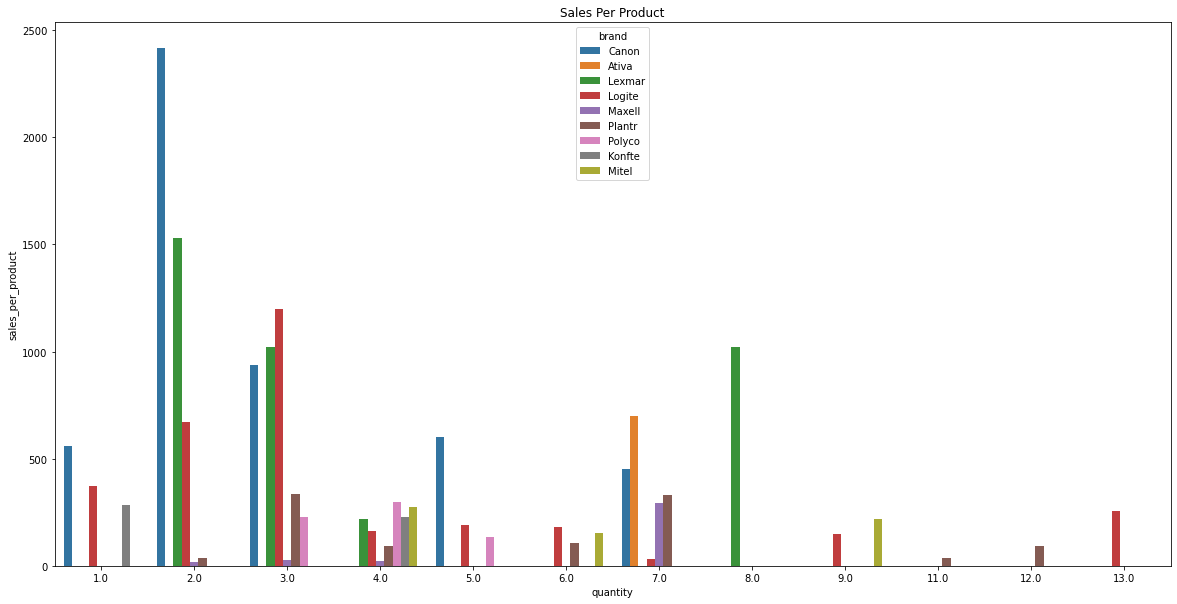

In [164]:
sns.barplot(data= top_product_lines, x = 'quantity', y= 'sales_per_product', hue = 'brand', ci = None, estimator = np.sum).set_title('Sales Per Product')

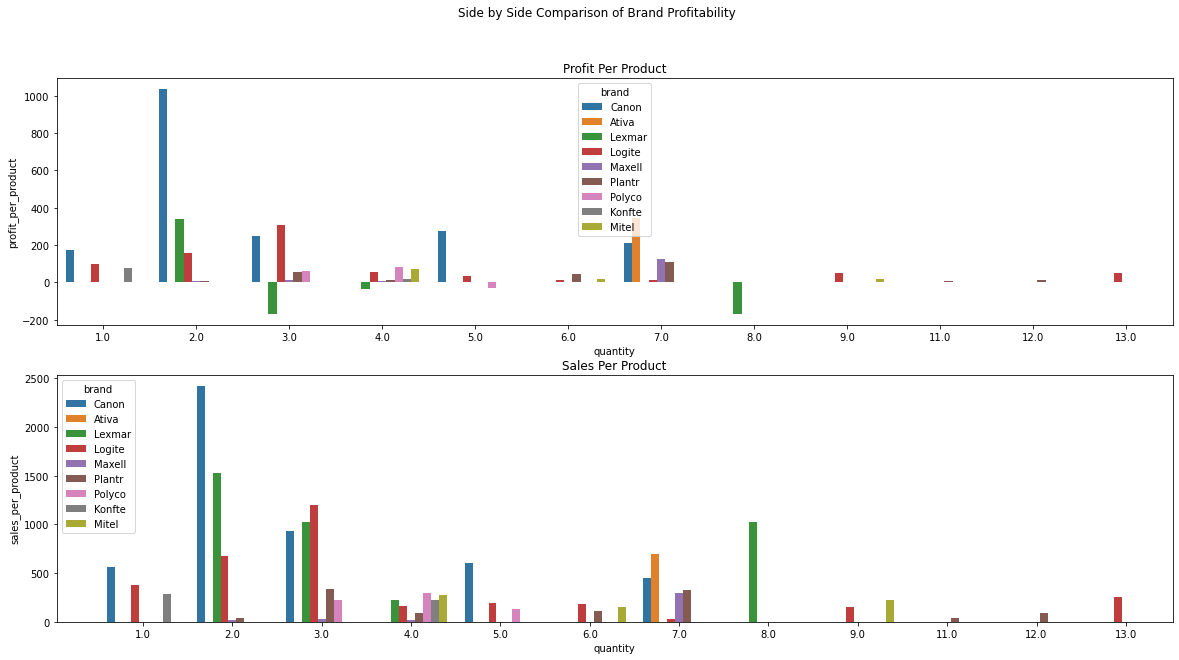

In [165]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,1)
fig.suptitle('Side by Side Comparison of Brand Profitability')
sns.barplot(data= top_product_lines, x = 'quantity', y= 'profit_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[0]).set_title('Profit Per Product')

sns.barplot(data= top_product_lines, x = 'quantity', y= 'sales_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[1]).set_title('Sales Per Product')

plt.autoscale()

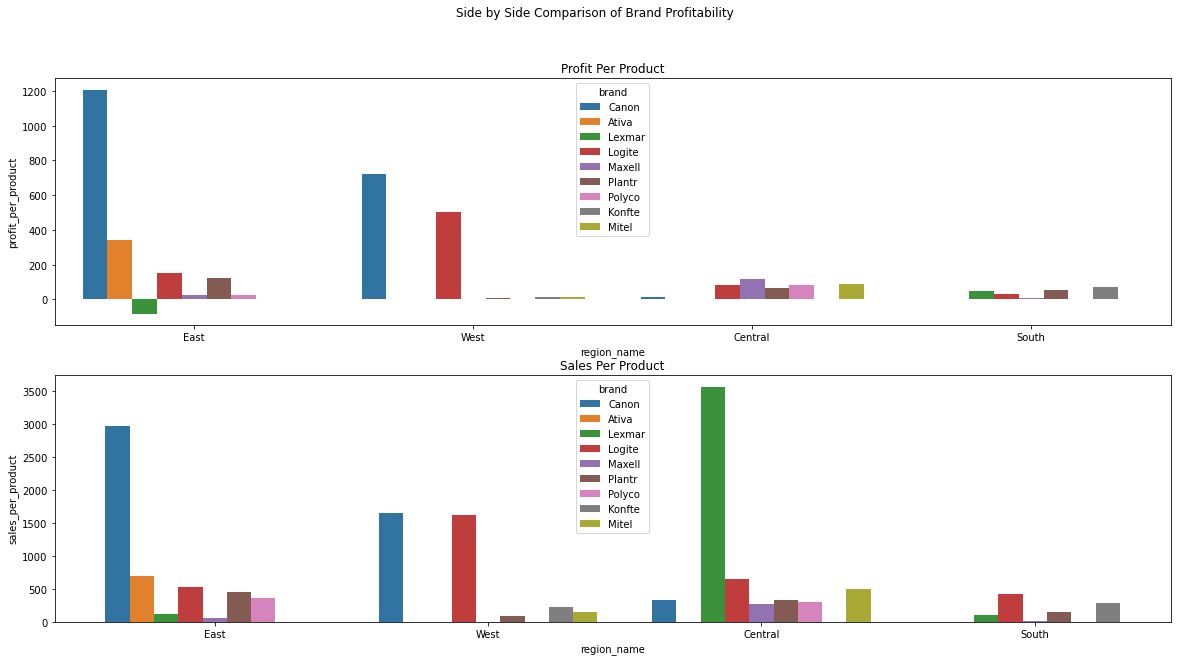

In [166]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,1)
fig.suptitle('Side by Side Comparison of Brand Profitability')
sns.barplot(data= top_product_lines, x = 'region_name', y= 'profit_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[0]).set_title('Profit Per Product')

sns.barplot(data= top_product_lines, x = 'region_name', y= 'sales_per_product', hue = 'brand', ci = None, estimator = np.sum, ax=ax[1]).set_title('Sales Per Product')

plt.autoscale()

In [167]:
top_product_lines.brand.value_counts()

Logite    43
Plantr    11
Canon      7
Lexmar     5
Maxell     5
Polyco     3
Mitel      3
Konfte     2
Ativa      1
Name: brand, dtype: int64

In [112]:
column2.value_counts()

Logite    43
Plantr    11
Canon      7
Lexmar     5
Maxell     5
Polyco     3
Mitel      3
Konfte     2
Ativa      1
Name: brand, dtype: int64

In [15]:
#Bookcases, Chairs, Furnishings, Tables 
furniture_df = df.loc[df['category'] == 'Furniture']

# subsetting by sub-category
bookcases = furniture_df.loc[furniture_df['sub_category'] == 'Bookcases']
chairs = furniture_df.loc[furniture_df['sub_category'] == 'Chairs']
furnishings = furniture_df.loc[furniture_df['sub_category'] == 'Furnishings']
tables = furniture_df.loc[furniture_df['sub_category'] == 'Tables']

# top 3 profitable products per category, per product
top3_bookcases = bookcases.sort_values(by='profit_per_product', ascending=False).head(3)
top3_chairs = chairs.sort_values(by='profit_per_product', ascending=False).head(3)
top3_furnishings = furnishings.sort_values(by='profit_per_product', ascending=False).head(3)
top3_tables = tables.sort_values(by='profit_per_product', ascending=False).head(3)

# data frame containing all 12 rows with top 3 products
bottom3_bookcases = bookcases.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_chairs = chairs.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_furnishings = furnishings.sort_values(by='profit_per_product', ascending=True).head(3)
bottom3_tables = tables.sort_values(by='profit_per_product', ascending=True).head(3)

# the three least profitable products per category, per product
top3_df_furniture = pd.concat([top3_bookcases, top3_chairs], axis=0)
top3_df_furniture = pd.concat([top3_df_furniture, top3_furnishings], axis=0)
top3_df_furniture = pd.concat([top3_df_furniture, top3_tables], axis=0)

# data frame containing all 12 rows with bottom 3 products 
bottom3_df_furniture = pd.concat([bottom3_bookcases, bottom3_chairs], axis=0)
bottom3_df_furniture = pd.concat([bottom3_df_furniture, bottom3_furnishings], axis=0)
bottom3_df_furniture = pd.concat([bottom3_df_furniture, bottom3_tables], axis=0)

In [107]:
print(accessories.shape)
print(copiers.shape)
machines.shape, phones.shape

(131, 23)
(10, 23)


((21, 23), (157, 23))

In [104]:
import mitosheet
mitosheet.sheet(top3_df, analysis_to_replay="id-csrwikzscg")

MitoWidget(analysis_data_json='{"analysisName": "id-csrwikzscg", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; # Analysis Name:id-csrwikzscg;
    
# Sorted profit_per_product in top3_df in descending order
top3_df = top3_df.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [93]:
import mitosheet
mitosheet.sheet(copiers, analysis_to_replay="id-fcadjzhndx")

MitoWidget(analysis_data_json='{"analysisName": "id-fcadjzhndx", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; # Analysis Name:id-fcadjzhndx;
    
# Sorted profit_per_product in copiers in descending order
copiers = copiers.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [ ]:
from mitosheet import *; # Analysis Name:id-fpkcldsous;
    
# Sorted profit_per_product in accessories in descending order
accessories = accessories.sort_values(by='profit_per_product', ascending=False, na_position='last')


In [ ]:
from mitosheet import *; # Analysis Name:id-nekmvczjte;
    
# Sorted profit_per_product in accessories in descending order
accessories = accessories.sort_values(by='profit_per_product', ascending=False, na_position='last')
